### [Hr_comma_sep](https://www.kaggle.com/liujiaqi/hr-comma-sepcsv/code)

Data Science Exercise

this is an analysis of employee data in the dataset "HR_comma_sep.csv" to find out what contributes to employees leaving the company


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns


In [2]:
df = pd.read_csv('../data/HR_comma_sep.csv', index_col=None)
df.isnull().any()  # Check the N/A values


satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.rename(columns=({
    'satisfaction_level': 'satisfaction',
    'last_evaluation': 'evaluation',
    'number_project': 'projectCount',
    'average_montly_hours': 'averageMonthlyHours',
    'time_spend_company': 'yearsAtCompany',
    'Work_accident': 'workAccident',
    'promotion_last_5years': 'promotion',
    'sales': 'department',
    'left': 'turnover'
}),
          inplace=True)
cols = list(df)

In [5]:
# Move 'turnover' to the first column.
cols.insert(0, cols.pop(cols.index('turnover')))
df = df.loc[:, cols]
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


In [6]:
# Statitical Analysis
df.shape


(14999, 10)

In [7]:
df.dtypes


turnover                 int64
satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
department              object
salary                  object
dtype: object

In [8]:
# turnover rate
turnover_rate = df.turnover.value_counts() / len(df)
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [9]:
df.describe()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [10]:
# Average statistics by groups
turnover_Summary = df.groupby('turnover')

In [11]:
turnover_Summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [12]:
# Correlation analysis
corr = df.corr()
corr

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
satisfaction,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
projectCount,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
averageMonthlyHours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
yearsAtCompany,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
workAccident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


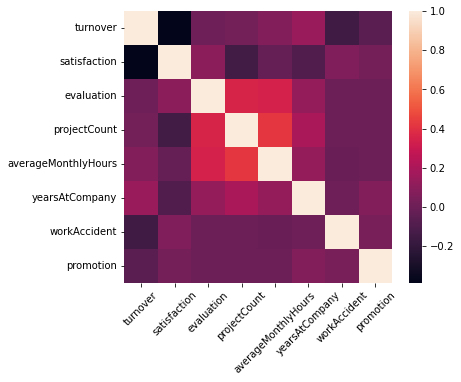

In [13]:
_, ax = plt.subplots(figsize=(6, 5))

C = sns.heatmap(corr,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values)
plt.xticks(rotation=45)
plt.show()

In [14]:
# Compare with the satisfaction rate between empolyees and turnover employees

emp_population = df['satisfaction'][df['turnover'] == 0].mean()
emp_turnover_satisfaction = df['satisfaction'][df['turnover'] == 1].mean()
print(
    f"Satisfaction of working employees:{round(emp_population,4)}, \nSatisfaction of turnover employees: {round(emp_turnover_satisfaction,4)}"
)


Satisfaction of working employees:0.6668, 
Satisfaction of turnover employees: 0.4401


In [15]:
# T-test
import scipy.stats as stats

In [16]:
# Satisfaction t-test
stats.ttest_1samp(a=df['satisfaction'][df['turnover'] == 1],
                  popmean=emp_population)


Ttest_1sampResult(statistic=-51.3303486754725, pvalue=0.0)

The p-value is very small, indicating that the satisfaction and employment are aparently different.


In [17]:
# Threshold
degree_freedom = len(df[df['turnover'] == 1])
# 95% confidence intervals left limit
LQ = stats.t.ppf(0.025, degree_freedom)
# 95% confidence intervals left limit
RQ = stats.t.ppf(0.975, degree_freedom)

print(
    f"The t-distribution left limit: {round(LQ,4)} \nThe t-distribution right limit: {round(RQ,4)}"
)


The t-distribution left limit: -1.9606 
The t-distribution right limit: 1.9606


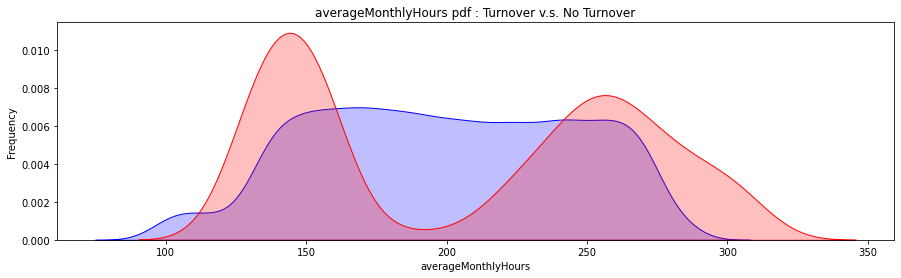

In [18]:
# pdf of "evaluation"
_, ax = plt.subplots(figsize=(15, 4))

ax = sns.kdeplot(df.loc[(df['turnover'] == 0), 'averageMonthlyHours'],
                 color='b',
                 shade=True,
                 label='No turnover')
ax = sns.kdeplot(df.loc[(df['turnover'] == 1), 'averageMonthlyHours'],
                 color='r',
                 shade=True,
                 label='Turnover')

ax.set(title="averageMonthlyHours pdf : Turnover v.s. No Turnover",
       xlabel='averageMonthlyHours',
       ylabel='Frequency')

plt.show()

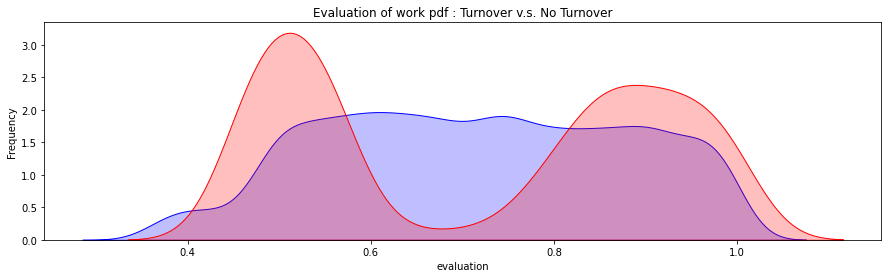

In [19]:
_, ax = plt.subplots(figsize=(15, 4))

ax = sns.kdeplot(df.loc[(df['turnover'] == 0), 'evaluation'],
                 color='b',
                 shade=True,
                 label='No turnover')
ax = sns.kdeplot(df.loc[(df['turnover'] == 1), 'evaluation'],
                 color='r',
                 shade=True,
                 label='Turnover')

ax.set(title="Evaluation of work pdf : Turnover v.s. No Turnover",
       xlabel='evaluation',
       ylabel='Frequency')
plt.show()

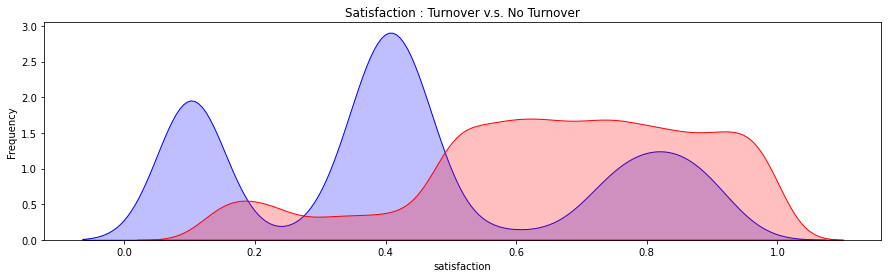

In [20]:
# Satisfaction evaluation

_, ax = plt.subplots(figsize=(15, 4))

ax = sns.kdeplot(df.loc[(df['turnover'] == 1), 'satisfaction'],
                 color='b',
                 shade=True,
                 label='No turnover')
ax = sns.kdeplot(df.loc[(df['turnover'] == 0), 'satisfaction'],
                 color='r',
                 shade=True,
                 label='Turnover')
ax.set(title="Satisfaction : Turnover v.s. No Turnover",
       xlabel='satisfaction',
       ylabel='Frequency')
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from six import StringIO
from IPython.display import Image

import pydotplus

In [22]:
# change the string to int

df['department'] = df['department'].astype('category').cat.codes
df['salary'] = df['department'].astype('category').cat.codes
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,7,7
1,1,0.80,0.86,5,262,6,0,0,7,7
2,1,0.11,0.88,7,272,4,0,0,7,7
3,1,0.72,0.87,5,223,5,0,0,7,7
4,1,0.37,0.52,2,159,3,0,0,7,7


In [23]:
y = df['turnover']
X = df.drop('turnover', axis=1)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)


In [25]:
dtree = tree.DecisionTreeClassifier(
    criterion="entropy",
    max_depth=3,  # define the depth of tree, preventing overfitting
    min_weight_fraction_leaf=0.1  # define leaf nodes
)

In [26]:
dtree = dtree.fit(X_train, y_train)

In [27]:
y_pred_dt = dtree.predict(X_test)


In [28]:
print('\n\n ----Decision Trees----')
dt_roc_auc = round(roc_auc_score(y_test, y_pred_dt), 4)
print('Decision Trees roc_auc_score: ', dt_roc_auc)
print(classification_report(y_test, y_pred_dt))




 ----Decision Trees----
Decision Trees roc_auc_score:  0.7055
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2286
           1       0.88      0.43      0.58       714

    accuracy                           0.85      3000
   macro avg       0.87      0.71      0.74      3000
weighted avg       0.86      0.85      0.83      3000



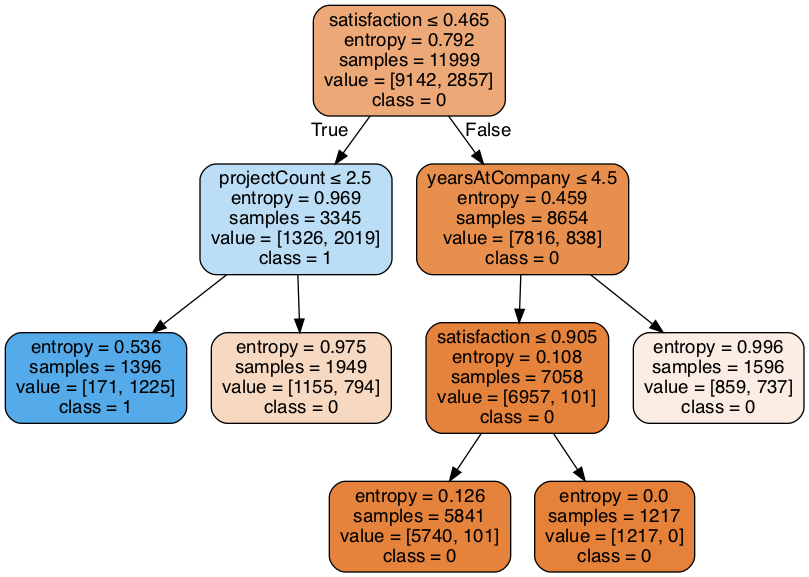

In [29]:
# Visualization
feature_names = df.drop(['turnover'], axis=1).columns
# file cache
dot_data = StringIO()
# import decision tree to the file
export_graphviz(dtree,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=feature_names,
                class_names=['0', '1'])
# 的dot to graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_png('diabetes.png')
Image(graph.create_png())

In [30]:
## Random Forest
rfc = RandomForestClassifier(criterion='entropy',
                             n_estimators=1000,
                             max_depth=None,
                             min_weight_fraction_leaf=0.01)
rfc.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', min_weight_fraction_leaf=0.01,
                       n_estimators=1000)

In [31]:
y_pred_rfc = rfc.predict(X_test)
rfc_roc_auc = round(roc_auc_score(y_test, y_pred_rfc), 4)


In [32]:
print('\n\n---Random Forest---\n\n Random Forest roc_auc_score:', rfc_roc_auc)
print(classification_report(y_test, y_pred_rfc))




---Random Forest---

 Random Forest roc_auc_score: 0.9502
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2286
           1       0.97      0.91      0.94       714

    accuracy                           0.97      3000
   macro avg       0.97      0.95      0.96      3000
weighted avg       0.97      0.97      0.97      3000



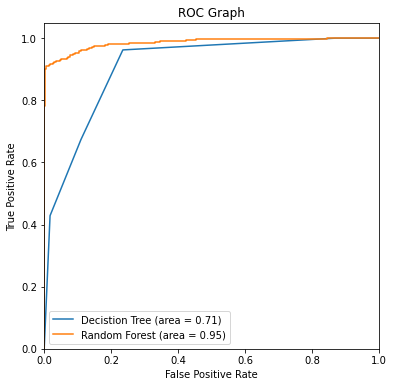

In [33]:
# Roc Plot
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test,
                                          dtree.predict_proba(X_test)[:, 1])
rfc_fpr, rfc_tpr, rfc_thresholds = roc_curve(y_test,
                                             rfc.predict_proba(X_test)[:, 1])
# plt.figure()

_, ax = plt.subplots(figsize=(6, 6))

ax.plot(dt_fpr, dt_tpr, label=f'Decistion Tree (area = {round(dt_roc_auc,2)})')
ax.plot(rfc_fpr,
        rfc_tpr,
        label=f'Random Forest (area = {round(rfc_roc_auc,2)})')

ax.set(title='ROC Graph',
       xlim=[0, 1],
       ylim=[0, 1.05],
       xlabel='False Positive Rate',
       ylabel='True Positive Rate')

plt.legend()
plt.show()


In [ ]:

Estimators = rfc.estimators_
# traverse
for index, model in enumerate(Estimators):

    dot_data = StringIO()

    export_graphviz(model,
                    out_file=dot_data,
                    feature_names=df.columns[1:],
                    class_names=['0', '1'],
                    filled=True,
                    rounded=True,
                    special_characters=True)
   
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
   
    # graph.write_png('Rfc{}.png'.format(index))
    
    plt.figure(figsize=(20, 20))
    # plt.imshow(plt.imread('Rfc{}.png'.format(index)))
    plt.axis('off')

/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_38765/300153923.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20, 20))


## Feature Importance Analysis


In [35]:
# fearture names and importances
feature_names = df.drop(['turnover'], axis=1).columns


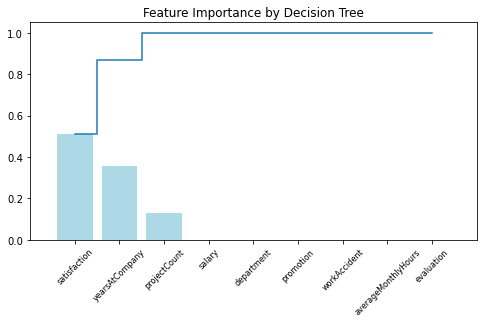

In [36]:
# Decision trees
dt_importances = dtree.feature_importances_
dt_indices = np.argsort(dt_importances)[::-1]

_, ax = plt.subplots(figsize=(8, 4))

ax.bar(range(len(dt_indices)),
       dt_importances[dt_indices],
       color='lightblue',
       align='center')

ax.step(range(len(dt_indices)),
        np.cumsum(dt_importances[dt_indices]),
        where='mid',
        label='Cumulative')
ax.set(title="Feature Importance by Decision Tree", xlim=[-1, len(dt_indices)])
plt.xticks(range(len(dt_indices)),
           feature_names[dt_indices],
           rotation=45,
           fontsize=8)

plt.show()

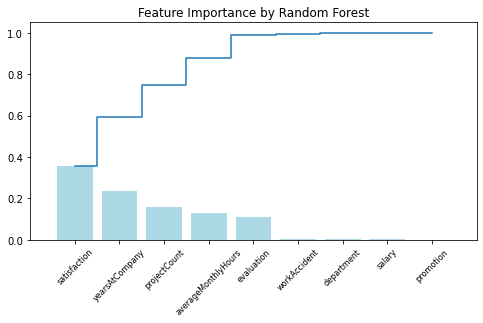

In [37]:
# Random Forest
rfc_importances = rfc.feature_importances_
rfc_indices = np.argsort(rfc_importances)[::-1]

_, ax = plt.subplots(figsize=(8, 4))

ax.bar(range(len(rfc_indices)),
       rfc_importances[rfc_indices],
       color='lightblue',
       align='center')

ax.step(range(len(rfc_indices)),
        np.cumsum(rfc_importances[rfc_indices]),
        where='mid',
        label='Cumulative')
ax.set(title="Feature Importance by Random Forest",
       xlim=[-1, len(rfc_indices)])
plt.xticks(range(len(rfc_indices)),
           feature_names[rfc_indices],
           rotation=45,
           fontsize=8)

plt.show()
